--- Tabela de Análise (Distância Mínima Média) ---


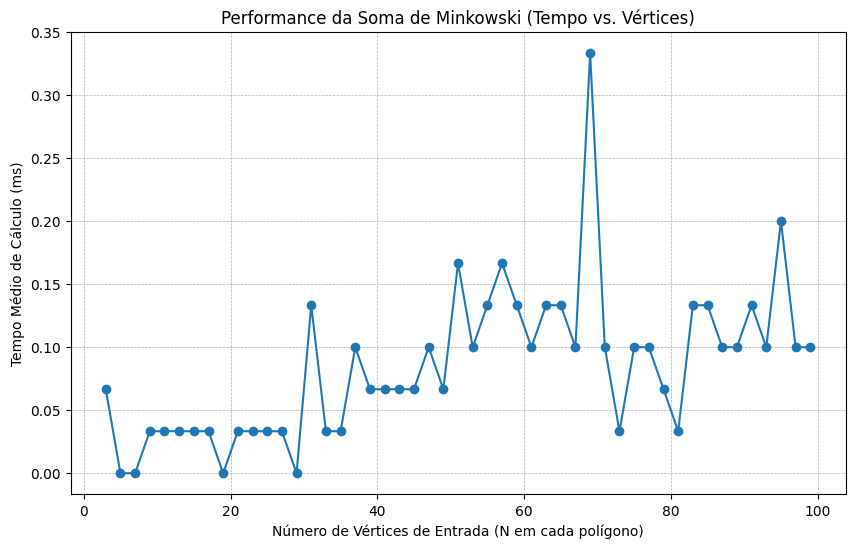

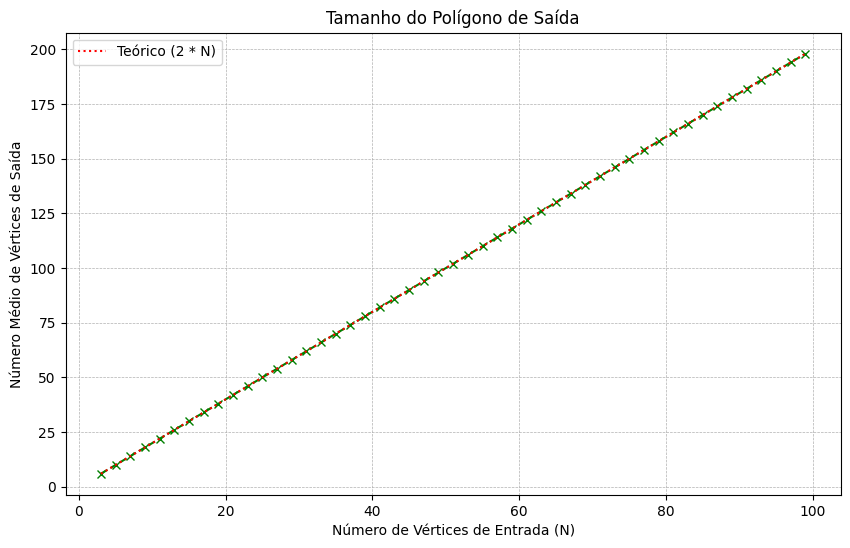

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os

JSON_FILENAME = 'minkowski_analysis.json'

def analisar_dados():

    if not os.path.exists(JSON_FILENAME):
        print(f"Error")
        return

    with open(JSON_FILENAME, 'r') as f:
        dados = json.load(f)

    df = pd.DataFrame(dados)

    print("--- Tabela de Análise (Distância Mínima Média) ---")

    tabela_df = df[['inputVertices', 'minDistanceAvg']].copy()
    tabela_df['minDistanceAvg'] = tabela_df['minDistanceAvg'].round(2)

    tabela_df.rename(columns={
        'inputVertices': 'Vértices (N)',
        'minDistanceAvg': 'Distância Mínima Média (px)'
    }, inplace=True)

    plt.figure(figsize=(10, 6))
    plt.plot(df['inputVertices'], df['calculationTimeMsAvg'], marker='o', linestyle='-')

    plt.title('Performance da Soma de Minkowski (Tempo vs. Vértices)')
    plt.xlabel('Número de Vértices de Entrada (N em cada polígono)')
    plt.ylabel('Tempo Médio de Cálculo (ms)')

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df['inputVertices'], df['outputVerticesAvg'], marker='x', linestyle='--', color='green')

    plt.plot(df['inputVertices'], 2 * df['inputVertices'], label='Teórico (2 * N)', color='red', linestyle=':')

    plt.title('Tamanho do Polígono de Saída')
    plt.xlabel('Número de Vértices de Entrada (N)')
    plt.ylabel('Número Médio de Vértices de Saída')

    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

if __name__ == "__main__":
    analisar_dados()